<a href="https://colab.research.google.com/github/HowardHNguyen/Natural_Language_Processing-NLP/blob/main/Sentiment_Analysis_for_English_using_fastText_methodology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create a Textblob object from the sentence

In [63]:
from textblob import TextBlob

# Define the Sentiment Polarity

In [64]:
def add_sentiment_polarity(text):
  """
  This function analyzes the sentiment of a sentence and returns a tuple containing
  the sentence and its sentiment polarity score.

  Args:
      text: The sentence to be analyzed.

  Returns:
      A tuple containing the sentence and its sentiment polarity score (float).
  """
  # Create a TextBlob object from the text
  sentiment_analysis = TextBlob(text)

  # Get the sentiment polarity score (ranges from -1 to 1)
  polarity_score = sentiment_analysis.polarity

  return text, polarity_score

# Loading the sentences - English version

In [65]:
# Example usage
sentences = [
"The aroma of freshly brewed coffee filled the air.",
"The vibrant colors of the autumn leaves captivated me.",
"The city skyline shimmered under the moonlight.",
"The sound of waves crashing against the shore soothed my soul.",
"The children's laughter echoed through the park.",
"The historical landmark stood as a testament to a bygone era.",
"The winding path led us deep into the lush forest.",
"The chef meticulously plated the exquisite dish.",
"The audience erupted in applause as the curtain fell.",
"The old rocking chair creaked gently on the porch.",
"The aroma of freshly baked cookies wafted from the kitchen.",
"The crisp mountain air invigorated my senses.",
"The bustling marketplace was a kaleidoscope of sights and sounds.",
"The tranquil lake reflected the beauty of the surrounding mountains.",
"The children built sandcastles on the beach with glee.",
"The majestic castle stood proudly atop the hill.",
"The winding road snaked through the rolling hills.",
"The talented artist captured the essence of the subject in a single stroke.",
"The play was a heartwarming story about love and loss.",
"The antique clock ticked rhythmically on the mantelpiece.",
"The aroma of freshly cut grass filled the air.",
"The breathtaking view from the mountain peak left me speechless.",
"The vibrant coral reefs teemed with colorful fish.",
"The tranquil melody of the piano filled the room.",
"The children were engrossed in a game of hide-and-seek.",
"The ancient ruins whispered tales of a forgotten civilization.",
"The winding river flowed serenely through the valley.",
"The skilled carpenter crafted a beautiful wooden chest.",
"The suspenseful thriller kept me on the edge of my seat.",
"The antique rocking horse brought back childhood memories."
  # ... other sentences
]

In [66]:
# Process each sentence and store the results
sentiment_data = []
for sentence in sentences:
  text, score = add_sentiment_polarity(sentence)
  sentiment_data.append((text, score))

# Returns a tuple containing the original sentence and the sentiment score.

In [67]:
# Print the sentiment data with sentence and polarity score
for text, score in sentiment_data:
  print(f"{text} - Sentiment Score: {score:.2f}")

The aroma of freshly brewed coffee filled the air. - Sentiment Score: 0.35
The vibrant colors of the autumn leaves captivated me. - Sentiment Score: 0.17
The city skyline shimmered under the moonlight. - Sentiment Score: 0.00
The sound of waves crashing against the shore soothed my soul. - Sentiment Score: 0.40
The children's laughter echoed through the park. - Sentiment Score: 0.00
The historical landmark stood as a testament to a bygone era. - Sentiment Score: 0.00
The winding path led us deep into the lush forest. - Sentiment Score: 0.05
The chef meticulously plated the exquisite dish. - Sentiment Score: 1.00
The audience erupted in applause as the curtain fell. - Sentiment Score: 0.00
The old rocking chair creaked gently on the porch. - Sentiment Score: 0.15
The aroma of freshly baked cookies wafted from the kitchen. - Sentiment Score: 0.30
The crisp mountain air invigorated my senses. - Sentiment Score: 0.25
The bustling marketplace was a kaleidoscope of sights and sounds. - Senti

# **ANALYSIS FOR ENGLISH VERSION**

In [68]:
!pip install fasttext

In [69]:
#from vncorenlp import VnCoreNLP
import fasttext

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Word vectors for 157 languages**

https://fasttext.cc/docs/en/crawl-vectors.html

In [71]:
import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')

'cc.en.300.bin'

In [72]:
# Load pre-trained FastText model for sentiment analysis - English version
model = fasttext.load_model('cc.en.300.bin')

In [73]:
model.get_dimension()

300

In [74]:
# Load pre-trained FastText model for sentiment analysis
# Replace '/path/to/pretrained_model.bin' with the path to your pre-trained FastText model
#model_path = 'https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.vi.300.bin'
#model = fasttext.load_model(model_path)

In [75]:
# Perform sentiment analysis
sentiment_labels = []
for sentence in sentences:
    # Get sentence embedding
    sentence_embedding = model.get_sentence_vector(sentence)
    # Perform classification based on the embedding (example: positive if the first dimension is greater than 0)
    if sentence_embedding[0] > 0:
        sentiment_labels.append('positive')
    else:
        sentiment_labels.append('negative')

In [76]:
# Display sentiment labels for each sentence
for sentence, label in zip(sentences, sentiment_labels):
    print("Sentence:", sentence)
    print("Sentiment:", label)
    print()

Sentence: The aroma of freshly brewed coffee filled the air.
Sentiment: negative

Sentence: The vibrant colors of the autumn leaves captivated me.
Sentiment: negative

Sentence: The city skyline shimmered under the moonlight.
Sentiment: negative

Sentence: The sound of waves crashing against the shore soothed my soul.
Sentiment: positive

Sentence: The children's laughter echoed through the park.
Sentiment: negative

Sentence: The historical landmark stood as a testament to a bygone era.
Sentiment: negative

Sentence: The winding path led us deep into the lush forest.
Sentiment: negative

Sentence: The chef meticulously plated the exquisite dish.
Sentiment: negative

Sentence: The audience erupted in applause as the curtain fell.
Sentiment: negative

Sentence: The old rocking chair creaked gently on the porch.
Sentiment: positive

Sentence: The aroma of freshly baked cookies wafted from the kitchen.
Sentiment: negative

Sentence: The crisp mountain air invigorated my senses.
Sentiment:

# Add Sentiment Polarity Scores to English dataframe

In [77]:
import pandas as pd
import fasttext

In [78]:
# load the pretrain English model from fastText
model = fasttext.load_model('cc.en.300.bin')

In [79]:
# load the English text file
en_text_file =  pd.read_csv('/content/drive/MyDrive/data/en_text_100.csv')

In [80]:
# calculate sentiment polarity scores for each sentence
sentiment_polarity_scores = []
for sentence in en_text_file['sentence']:
    # Get sentence embedding
    sentence_embedding = model.get_sentence_vector(sentence)
    # Calculate polarity score (e.g., using the dot product of the embedding with a positive/negative vector)
    # For simplicity, let's use the dot product with a positive/negative unit vector
    positive_vector = [1, 0, 0]  # Positive unit vector
    negative_vector = [-1, 0, 0]  # Negative unit vector
    positive_score = sum(x * y for x, y in zip(sentence_embedding, positive_vector))
    negative_score = sum(x * y for x, y in zip(sentence_embedding, negative_vector))
    polarity_score = positive_score - negative_score
    sentiment_polarity_scores.append(polarity_score)

In [81]:
# add sentiment polarity scores as a new column in the dataframe
en_text_file['sentiment_polarity_score'] = sentiment_polarity_scores

In [82]:
en_text_file.head()

,sentence,sentiment,sentiment_polarity_score
0,The aroma of freshly brewed coffee filled the ...,NaN,-0.037620
1,The vibrant colors of the autumn leaves captiv...,NaN,-0.004688
2,The city skyline shimmered under the moonlight.,NaN,-0.070902
3,The sound of waves crashing against the shore ...,NaN,0.005799
4,The children's laughter echoed through the park.,NaN,-0.013347


# Add new column for Sentiment values

In [83]:
# define thresholds for sentiment classification
positive_threshold = 0.01
negative_threshold = -0.01

In [84]:
# function to classify sentiment based on polarity score
def classify_sentiment(polarity_score):
    if polarity_score > positive_threshold:
        return 'positive'
    elif polarity_score < negative_threshold:
        return 'negative'
    else:
        return 'neutral'

In [85]:
# apply sentiment classfication to each row in the dataframe
en_text_file['sentiment'] = en_text_file['sentiment_polarity_score'].apply(classify_sentiment)

In [86]:
en_text_file.head(5)

,sentence,sentiment,sentiment_polarity_score
0,The aroma of freshly brewed coffee filled the ...,negative,-0.037620
1,The vibrant colors of the autumn leaves captiv...,neutral,-0.004688
2,The city skyline shimmered under the moonlight.,negative,-0.070902
3,The sound of waves crashing against the shore ...,neutral,0.005799
4,The children's laughter echoed through the park.,negative,-0.013347


In [87]:
# Save the updated DataFrame to a new CSV file
en_text_file.to_csv('/content/drive/MyDrive/data/final_english_text_file.csv', index=False)

In [88]:
import matplotlib.pyplot as plt

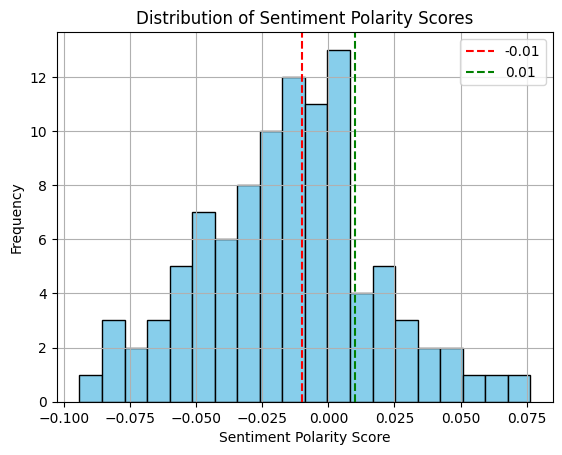

In [89]:
# plot histogram of sentiment polarity scores to analyze the distribution of the
# sentiment polarity score in the dataset
plt.hist(en_text_file['sentiment_polarity_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Polarity Scores')
plt.xlabel('Sentiment Polarity Score')
plt.ylabel('Frequency')

# Add vertical lines at -0.01 and 0.01 - neutral range.
plt.axvline(x=-0.01, color='r', linestyle='--', label='-0.01')
plt.axvline(x=0.01, color='g', linestyle='--', label='0.01')

plt.legend()  # Show legend
plt.grid(True)
plt.show()

In [90]:
# coun the number of occurances of each sentiment label
sentiment_counts = en_text_file['sentiment'].value_counts()

**To show the percentages on each bar:**
1. We calculate the total count by summing all the counts in the sentiment_counts Series.
2. We use this total count to compute the percentage of each sentiment label relative to the total count.
3. We annotate each bar with its correct percentage value, ensuring that the percentages sum up to 100%.

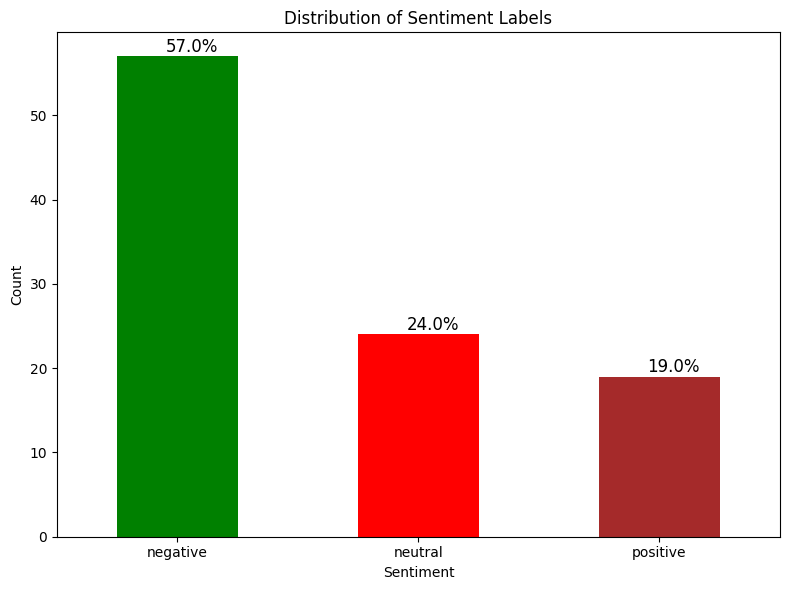

In [91]:
plt.figure(figsize=(8, 6))
ax = sentiment_counts.plot(kind='bar', color=['green', 'red', 'brown'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels

# Calculate total count
total = float(sum(sentiment_counts))

# Annotate each bar with its percentage value
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 0.5
    ax.annotate(percentage, (x, y), size=12)

plt.tight_layout()
plt.show()

# Conclusion:
In the sample dataset of 100 records, we have 57% negative, 24% neutral, and 19% positive on the sentiment polarity score analysis.